Visualise and download Sentinel products using geojson

In [1]:
import geopandas as gpd
import folium
import os
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt
import numpy as np
import os
#from geojson import Point
from geojson import Polygon
import geojson
import tempfile
import datetime as dt


Show geojson boundary on folium map


In [3]:
m = folium.Map(location=[35.9452,14.3797], zoom_start=10)
boundsdata = r'C:/Users/X409/Desktop/project/pythonProject/data/malta.geojson'
folium.GeoJson(boundsdata).add_to(m)
m


Connect to Sentinelsat API

In [4]:
user = 'clintbusu' ## change this!
password = '150299cb' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

#convert geojson to well-known-text
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)


MULTIPOLYGON(((14.5671 35.8456,14.5618 35.8298,14.5480 35.8360,14.5325 35.8220,14.5275 35.8135,14.5275 35.8012,14.5115 35.8065,14.5071 35.8087,14.4727 35.8114,14.4245 35.8237,14.3815 35.8430,14.3630 35.8667,14.3599 35.8697,14.3457 35.8759,14.3426 35.8807,14.3426 35.9117,14.3382 35.9470,14.3325 35.9628,14.3220 35.9731,14.3347 35.9824,14.3475 35.9887,14.3615 35.9924,14.3773 35.9936,14.3773 35.9862,14.3682 35.9848,14.3623 35.9824,14.3494 35.9731,14.4285 35.9657,14.4451 35.9604,14.4787 35.9370,14.5078 35.9285,14.5129 35.9208,14.5140 35.9108,14.5139 35.9008,14.5193 35.9000,14.5480 35.8900,14.5632 35.8700,14.5671 35.8456)),((14.2776 36.0167,14.2600 36.0135,14.2415 36.0146,14.2209 36.0192,14.2012 36.0261,14.1849 36.0346,14.1880 36.0454,14.1843 36.0563,14.1836 36.0648,14.1955 36.0681,14.2566 36.0756,14.2826 36.0679,14.3148 36.0511,14.3342 36.0344,14.3220 36.0272,14.3045 36.0266,14.2776 36.0167)))


Search for Sentinel Products

In [12]:
#search sentinel product
products = api.query(footprint,
                     date = ('20200215', '20200227'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1C',
                     cloudcoverpercentage = (0, 5))

Print table with Sentinel products found

In [14]:
api.to_geodataframe(products)


C:\anaconda\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,beginposition,endposition,ingestiondate,...,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,level1cpdiidentifier,uuid,granuleidentifier,datastripidentifier,geometry
348e243b-5ab3-4908-8a37-0937229b4a95,S2B_MSIL1C_20200217T095029_N0209_R079_T33SVV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-02-17T09:50:29.024Z, Instrument: MS...",false,2020-02-17 09:50:29.024,2020-02-17 09:50:29.024,2020-02-17 09:50:29.024,2020-02-17 16:13:13.247,...,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200217T095029_N0209_R079_T33SVV_2...,S2B_OPER_MSI_L1C_TL_SGS__20200217T115035_A0154...,348e243b-5ab3-4908-8a37-0937229b4a95,S2B_OPER_MSI_L1C_TL_SGS__20200217T115035_A0154...,S2B_OPER_MSI_L1C_DS_SGS__20200217T115035_S2020...,"MULTIPOLYGON (((13.90171 35.14991, 15.00335 35..."
127ffbed-2113-4f9b-bb42-58e065eed966,S2B_MSIL1C_20200217T095029_N0209_R079_T33SVA_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-02-17T09:50:29.024Z, Instrument: MS...",false,2020-02-17 09:50:29.024,2020-02-17 09:50:29.024,2020-02-17 09:50:29.024,2020-02-17 16:11:39.818,...,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200217T095029_N0209_R079_T33SVA_2...,S2B_OPER_MSI_L1C_TL_SGS__20200217T115035_A0154...,127ffbed-2113-4f9b-bb42-58e065eed966,S2B_OPER_MSI_L1C_TL_SGS__20200217T115035_A0154...,S2B_OPER_MSI_L1C_DS_SGS__20200217T115035_S2020...,"MULTIPOLYGON (((13.88932 36.05158, 15.10837 36..."


Visualise product footprints

C:\anaconda\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


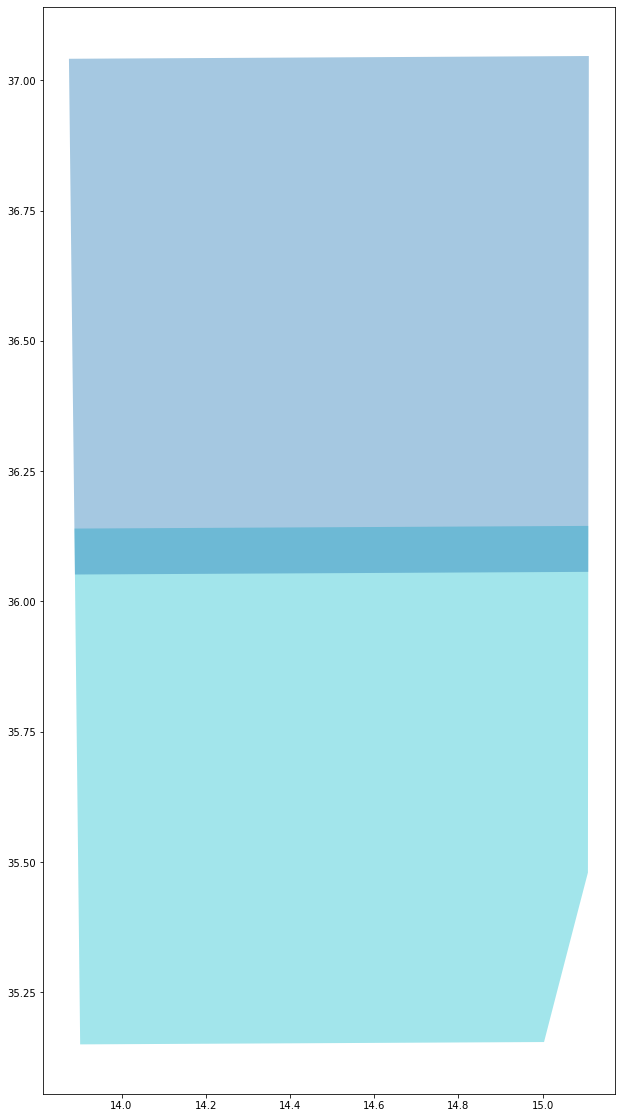

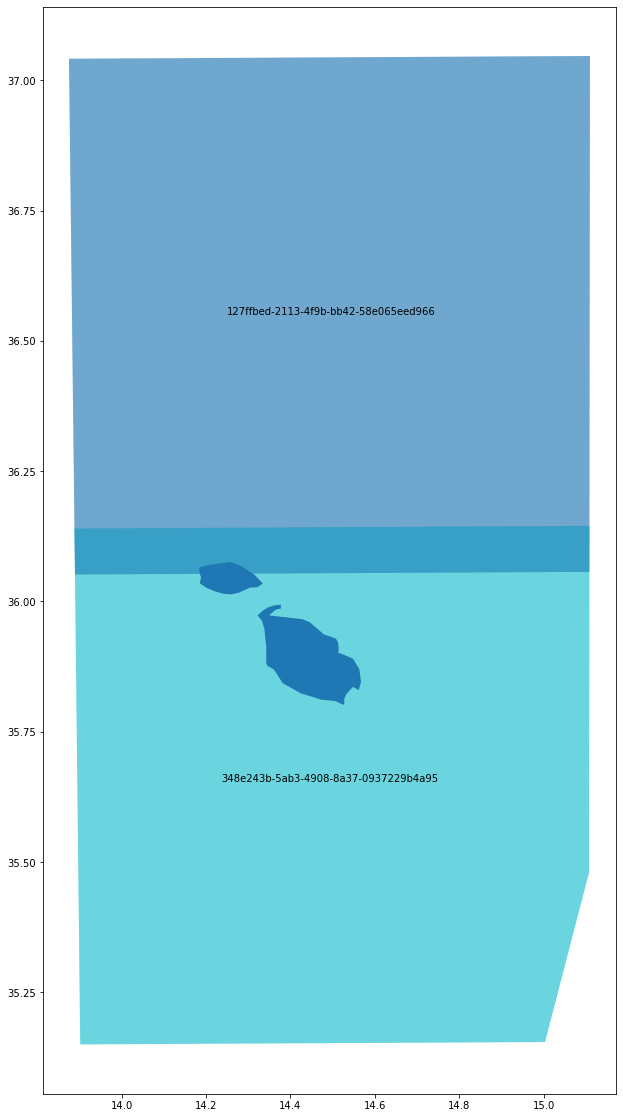

C:\anaconda\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,ondemand,datatakesensingstart,beginposition,endposition,ingestiondate,...,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,level1cpdiidentifier,uuid,granuleidentifier,datastripidentifier,geometry
348e243b-5ab3-4908-8a37-0937229b4a95,S2B_MSIL1C_20200217T095029_N0209_R079_T33SVV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-02-17T09:50:29.024Z, Instrument: MS...",false,2020-02-17 09:50:29.024,2020-02-17 09:50:29.024,2020-02-17 09:50:29.024,2020-02-17 16:13:13.247,...,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200217T095029_N0209_R079_T33SVV_2...,S2B_OPER_MSI_L1C_TL_SGS__20200217T115035_A0154...,348e243b-5ab3-4908-8a37-0937229b4a95,S2B_OPER_MSI_L1C_TL_SGS__20200217T115035_A0154...,S2B_OPER_MSI_L1C_DS_SGS__20200217T115035_S2020...,"MULTIPOLYGON (((13.90171 35.14991, 15.00335 35..."
127ffbed-2113-4f9b-bb42-58e065eed966,S2B_MSIL1C_20200217T095029_N0209_R079_T33SVA_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2020-02-17T09:50:29.024Z, Instrument: MS...",false,2020-02-17 09:50:29.024,2020-02-17 09:50:29.024,2020-02-17 09:50:29.024,2020-02-17 16:11:39.818,...,2017-013A,DESCENDING,Sentinel-2B,Level-1C,S2B_MSIL1C_20200217T095029_N0209_R079_T33SVA_2...,S2B_OPER_MSI_L1C_TL_SGS__20200217T115035_A0154...,127ffbed-2113-4f9b-bb42-58e065eed966,S2B_OPER_MSI_L1C_TL_SGS__20200217T115035_A0154...,S2B_OPER_MSI_L1C_DS_SGS__20200217T115035_S2020...,"MULTIPOLYGON (((13.88932 36.05158, 15.10837 36..."


In [15]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None, alpha=0.4, figsize=(20, 20))

ax = areas.plot(column='uuid', cmap=None, alpha=0.4, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

gdf2 = gpd.read_file(boundsdata)
#f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None, alpha=0.4, figsize=(20, 20))
gdf2.plot(ax=ax)
plt.show()

products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted


Connect to Sentinelsat API and download all products


In [8]:
api.download_all(products)

({},
 {'16eb9527-fd2a-44c1-a4e6-36e506a6d7c4': {'id': '16eb9527-fd2a-44c1-a4e6-36e506a6d7c4',
   'title': 'S2A_MSIL1C_20181007T094031_N0206_R036_T33SVV_20181007T115542',
   'size': 363264257,
   'md5': 'C6A6201FA1AA7AB5BBDF971E4CD3A17B',
   'date': datetime.datetime(2018, 10, 7, 9, 40, 31, 24000),
   'footprint': 'POLYGON((14.18028550187583 35.15105151111466,14.218458271117356 35.290216441525445,14.259005982777753 35.43773282642145,14.299623005551824 35.58524911186538,14.340557995360236 35.732767098364995,14.382017565269187 35.880245260785095,14.42302482927292 36.027945658080675,14.45515128601461 36.142112252258045,15.108489607947968 36.14484927635336,15.107159202344487 35.1548426456455,14.18028550187583 35.15105151111466))',
   'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('16eb9527-fd2a-44c1-a4e6-36e506a6d7c4')/$value",
   'Online': False,
   'Creation Date': datetime.datetime(2018, 10, 7, 16, 31, 55, 363000),
   'Ingestion Date': datetime.datetime(2018, 10, 7, 16, 29, 

Connect to Sentinelsat API and download a single products

Get the uuid and inspect product data

In [16]:
api.get_product_odata('348e243b-5ab3-4908-8a37-0937229b4a95')

{'id': '348e243b-5ab3-4908-8a37-0937229b4a95',
 'title': 'S2B_MSIL1C_20200217T095029_N0209_R079_T33SVV_20200217T115035',
 'size': 576847774,
 'md5': '505BFFD6F5FBC2A060C3F2C61A02B442',
 'date': datetime.datetime(2020, 2, 17, 9, 50, 29, 24000),
 'footprint': 'POLYGON((15.107595631286257 35.47960642073328,15.0835074882006 35.40487104888331,15.036371298044182 35.257850644898745,15.003354215088628 35.154418058486044,13.90170709137836 35.149912058963785,13.888074907813033 36.139736604513345,15.108489607947968 36.14484927635336,15.107595631286257 35.47960642073328))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('348e243b-5ab3-4908-8a37-0937229b4a95')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2020, 2, 17, 16, 13, 51, 753000),
 'Ingestion Date': datetime.datetime(2020, 2, 17, 16, 13, 13, 247000)}

Download the data

In [19]:
api.download('348e243b-5ab3-4908-8a37-0937229b4a95')

Product 348e243b-5ab3-4908-8a37-0937229b4a95 is not online. Triggering retrieval from long term archive.


{'id': '348e243b-5ab3-4908-8a37-0937229b4a95',
 'title': 'S2B_MSIL1C_20200217T095029_N0209_R079_T33SVV_20200217T115035',
 'size': 576847774,
 'md5': '505BFFD6F5FBC2A060C3F2C61A02B442',
 'date': datetime.datetime(2020, 2, 17, 9, 50, 29, 24000),
 'footprint': 'POLYGON((15.107595631286257 35.47960642073328,15.0835074882006 35.40487104888331,15.036371298044182 35.257850644898745,15.003354215088628 35.154418058486044,13.90170709137836 35.149912058963785,13.888074907813033 36.139736604513345,15.108489607947968 36.14484927635336,15.107595631286257 35.47960642073328))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('348e243b-5ab3-4908-8a37-0937229b4a95')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2020, 2, 17, 16, 13, 51, 753000),
 'Ingestion Date': datetime.datetime(2020, 2, 17, 16, 13, 13, 247000),
 'path': '.\\S2B_MSIL1C_20200217T095029_N0209_R079_T33SVV_20200217T115035.zip',
 'downloaded_bytes': 0}